# Cats vs Dogs Classification using CNN

## Dogs and Cats Dataset
https://www.tensorflow.org/datasets/catalog/cats_vs_dogs

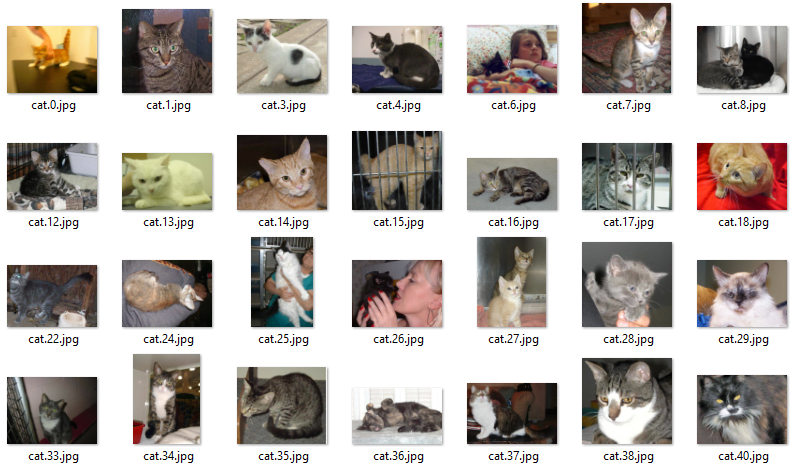

- The Dogs and Cats dataset contains around 23k images of dogs and cats.
- We will be downloading the dataset from the TensorFlow Datasets library.
- The dataset is already split into training and validation sets, so we don't need to split it manually.
- The dataset is also already preprocessed and all images are of the same size (256 x 256 x 3).
- For better understanding of the dataset, I would be downloading the dataset and then visualizing it.

# !pip install tensorflow_datasets

!pip install tensorflow_datasets

In [1]:
# Import libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

In [3]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [4]:
for i, example in enumerate(dataset['train']):
  # example = (image, label)
  image, label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = save_dir + "/" + "{}_{}.jpg".format(class_names[label], i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())
  # print(filename)
  # break

## Building Convolutions Neural Network (CNN) Model with Image Augmentation


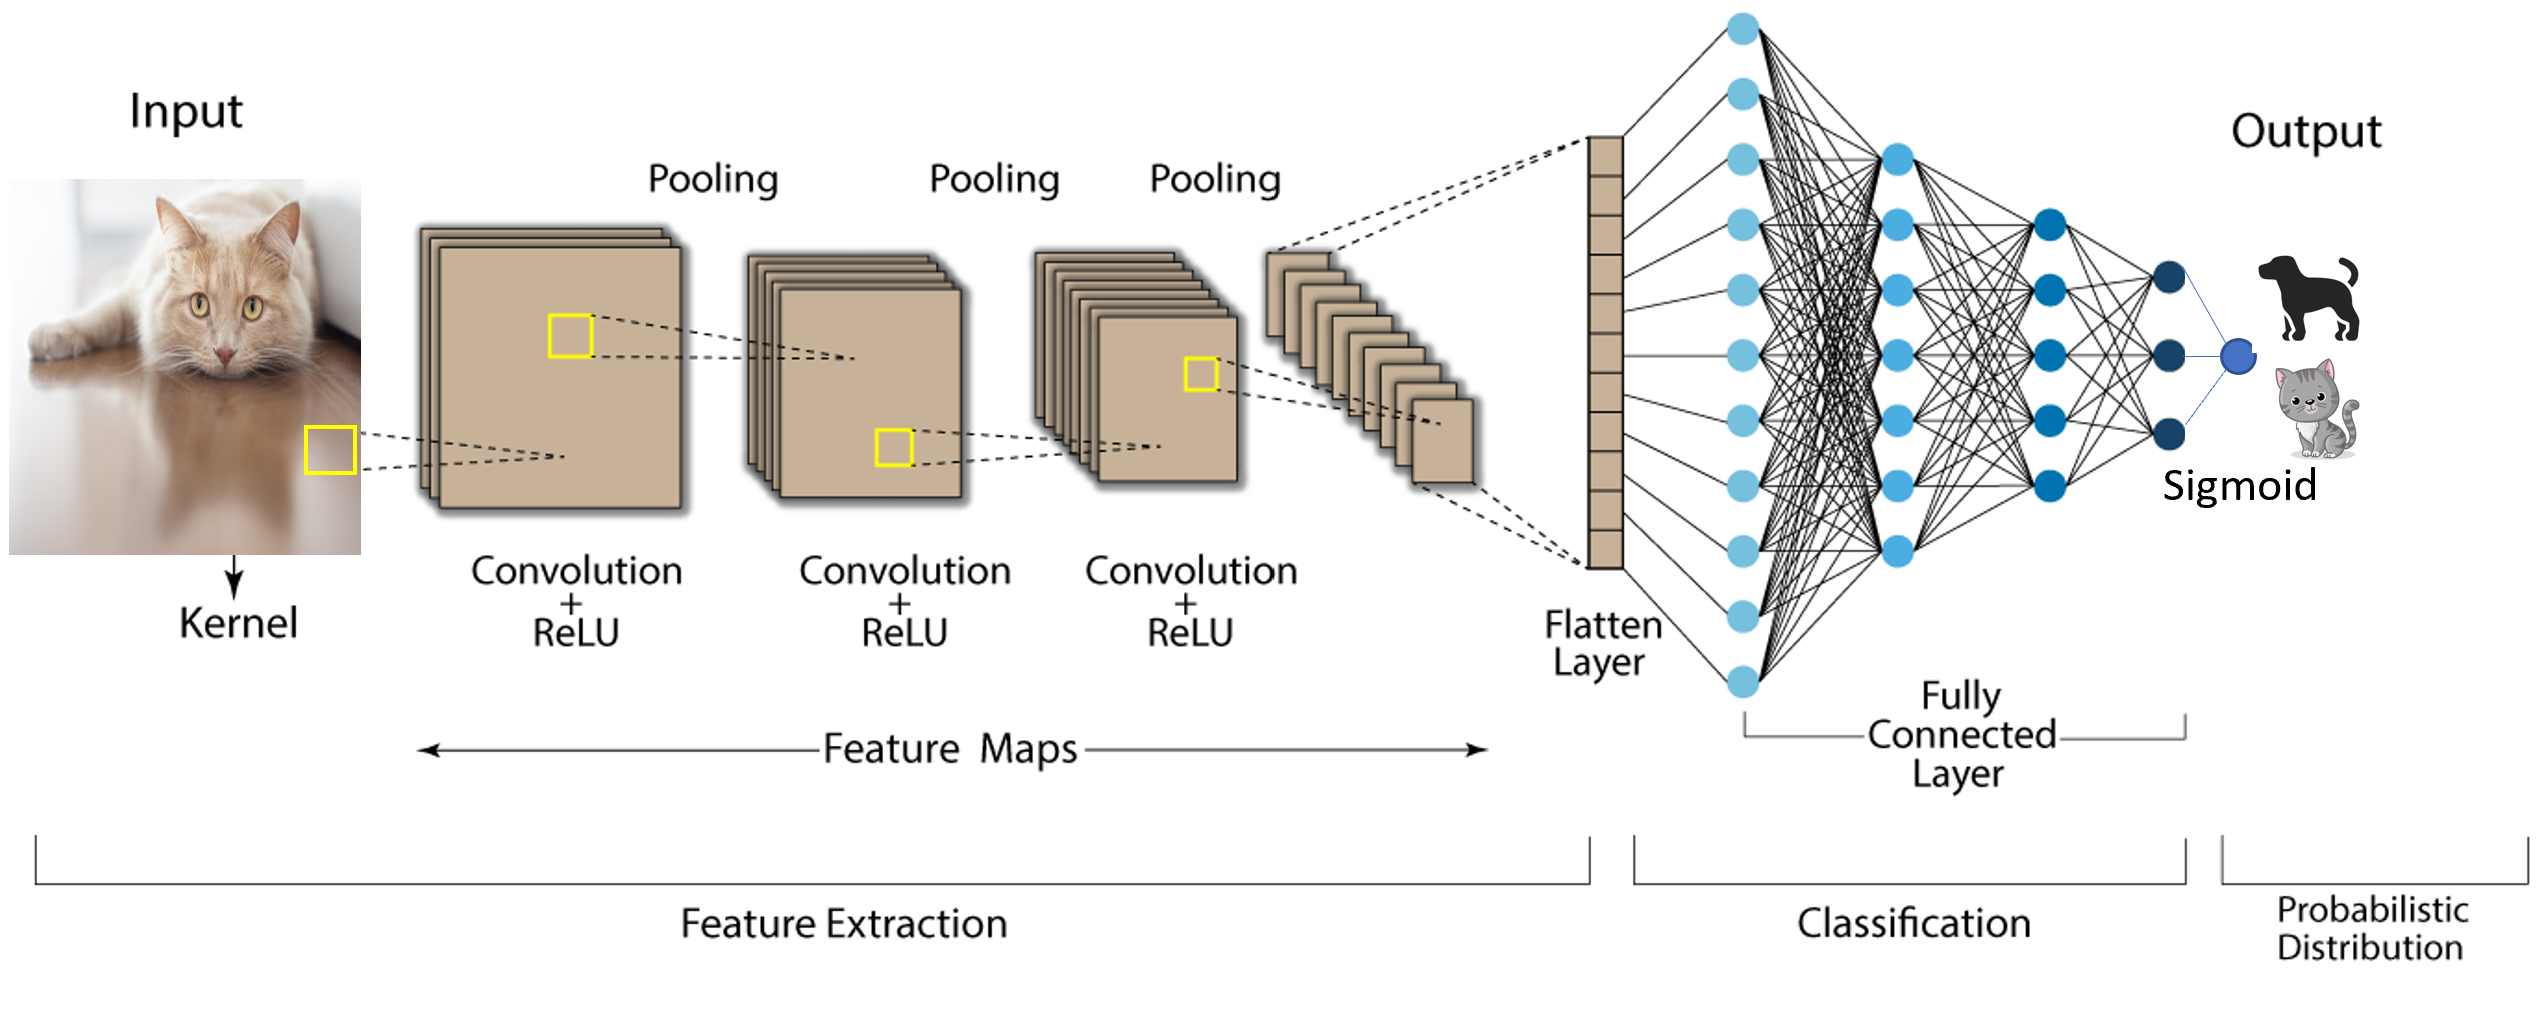

- CNN Building Blocks
    - Input Layer
    - Convolutional Layer
    - Pooling Layer
    - Dropout Layer
    - Batch Normalization Layer
    - Activation Layer
    - Fully Connected Layer
    - Flatten Layer
    - Output Layer
    

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [6]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10,
                              width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.10, horizontal_flip=True)

In [7]:

train_generator = datagen.flow_from_directory('./cats_vs_dogs/train',
                                              target_size=(150, 150), 
                                              batch_size=32, 
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('./cats_vs_dogs/train',
                                                   target_size=(150, 150), 
                                                   batch_size=32, 
                                                   class_mode='binary',
                                                   subset='validation')


Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


### build CNN Model


In [8]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# 1st layer CNN
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2nd layer CNN
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 3rd Layer
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))





In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 74, 74, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10



582/582 [==============================] - 476s 814ms/step - loss: 1.4043 - accuracy: 0.6488 - val_loss: 0.6289 - val_accuracy: 0.6547
Epoch 2/10
582/582 [==============================] - 708s 1s/step - loss: 0.5550 - accuracy: 0.7169 - val_loss: 0.5699 - val_accuracy: 0.7214
Epoch 3/10
582/582 [==============================] - 722s 1s/step - loss: 0.5208 - accuracy: 0.7411 - val_loss: 0.5988 - val_accuracy: 0.6756
Epoch 4/10
582/582 [==============================] - 654s 1s/step - loss: 0.4842 - accuracy: 0.7702 - val_loss: 0.4788 - val_accuracy: 0.7682
Epoch 5/10
582/582 [==============================] - 318s 547ms/step - loss: 0.4553 - accuracy: 0.7848 - val_loss: 0.6358 - val_accuracy: 0.6491
Epoch 6/10
582/582 [==============================] - 324s 557ms/step - loss: 0.4363 - accuracy: 0.7990 - val_loss: 0.4556 - val_accuracy: 0.8018
Epoch 7/10
582/582 [==============================] - 325s 559ms/step - loss: 0.4147 - accuracy: 0.8089 - val_loss: 0.4493 - val_accuracy: 0.795

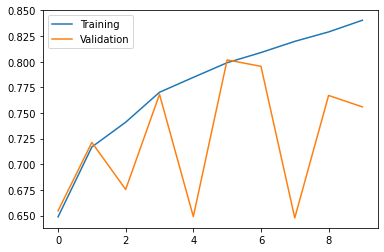

In [18]:
history.history

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(['Training', 'Validation'])


In [19]:
# save model
model.save('cats_vs_dogs.h1')

INFO:tensorflow:Assets written to: cats_vs_dogs.h1\assets


INFO:tensorflow:Assets written to: cats_vs_dogs.h1\assets


In [20]:
model_load = tf.keras.models.load_model('cats_vs_dogs.h1')

In [21]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image

img_url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))

image_array = image.img_to_array(img)

img = np.expand_dims(image_array, axis=0)

img = img/255

prediction = model.predict(img)

TH = 0.5
prediction = int(prediction[0][0]>TH)
classes = {v:k for k,v in train_generator.class_indices.items()}
classes[prediction]

1/1 [==============================] - 0s 32ms/step


'cat'